Benedicte Kühl Hejgaard (s164533), Andreas Jørck (s144713) - 42577 Introduction to Business Analytics 2019

Distribution of work: We contributed equally and have both assessed each part. Text have been written in collaboration. The main responsibilities for each section are outlined below:
- $\textbf{Benedicte}$: Data cleaning and descriptive analysis (predictive), Random forest (predictive), Neural Network (predictive), Linear Regression (exploratory)
- $\textbf{Andreas}$: Maps and Further Dataprep (predictive), Logistic regression (predictive), data gatherings (exploratory), Kmeans (exploratory)


# Chile Household Report

This study analyses the housing market in Santiago de Chile based on a dataset on house transactions, including geospatial data, household characteristics and transport accessibility. The study has three main sections; An initial analysis of the data, a prediction challenge and an exploratory study.

## Introduction to Dataset

The data is loaded and inspected.

In [81]:
# Loading neccesary packages
import pandas as pd
import numpy as np
household_data_raw = pd.read_excel('Households Data.xlsx', sheet_name='Hogares')

In [82]:
household_data_raw.head()

Hogar  EXCLUIR  paraValidacion  Sector    DirCoordX    DirCoordY  \
0  100010        0               0       7  335180.8019  6266420.975   
1  100020        0               0       7  338410.2114  6265607.141   
2  100030        0               0       7  327863.8248  6257800.086   
3  100041        0               0       7  327864.0000  6257800.000   
4  100052        0               0       7  338480.8152  6267296.941   

   MontoArr  IngresoHogar      Factor  AnosEstudio  ...  \
0    100000        450845  136.393738           11  ...   
1    120000       1019369   73.843597           11  ...   
2     70000         80000  180.722809           10  ...   
3     80000        559259  150.379059           14  ...   
4    117771        710309  122.001518           12  ...   

   Acc_Habitacion_tpte_pub  Acc_Industria_tpte_pub  Acc_Servicios_tpte_pub  \
0               6110.62492               671.08681               719.84272   
1               6110.62492               671.08681               719.84272   
2               6110.62492               671.08681               719.84272   
3               6110.62492               671.08681               719.84272   
4               6110.62492               671.08681               719.84272   

   Acc_Comercio_auto  Acc_Educacion_auto  Acc_Habitacion_auto  \
0            3036.41             1781.81             30505.65   
1            3036.41             1781.81             30505.65   
2            3036.41             1781.81             30505.65   
3            3036.41             1781.81             30505.65   
4            3036.41             1781.81             30505.65   

   Acc_Industria_auto  Acc_Servicios_auto  CLUSTER7  CLUSTER2  
0             2853.19             3058.03         3         1  
1             2853.19             3058.03         3         1  
2             2853.19             3058.03         3         1  
3             2853.19             3058.03         3         1  
4             2853.19             3058.03         3         1  

[5 rows x 30 columns]

In [83]:
household_data_raw.columns

Index(['Hogar', 'EXCLUIR', 'paraValidacion', 'Sector', 'DirCoordX',
       'DirCoordY', 'MontoArr', 'IngresoHogar', 'Factor', 'AnosEstudio',
       'CLASE', 'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv',
       'DensConstr_EOD', 'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM',
       'Tiempo_Com_Stgo', 'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto', 'CLUSTER7', 'CLUSTER2'],
      dtype='object')

In [84]:
print('The initial size of the dataset: ',household_data_raw.size)

The initial size of the dataset:  547920


We place the house ID as index for the remainder of the report

In [85]:
household_data_raw.set_index('Hogar', inplace=True)

## Preparation of dataset

In order to use our dataset for a analysis, we first need to clean our dataset. Initially, we remove all rows with invalid answers (EXCLUIR = 1). Furthermore, we wish to remove any columns that contain results from previous analyses that were done. This includes the parameters ParaValidacion (sample for validation), CLUSTER2, CLUSTER7 (both assumed to be a result of a previous clustering):

In [86]:
household_data_raw = household_data_raw[household_data_raw.EXCLUIR != 1];
household_data_raw = household_data_raw.drop(columns=['paraValidacion','EXCLUIR','CLUSTER7','CLUSTER2']);

In [87]:
print('Size of the dataset after this step: ',household_data_raw.size)

Size of the dataset after this step:  401175


This should remove all the variables where the response was -99 (meaning no reply). To be safe, we check for -99 values, along with removing any NaN responses:

In [88]:
if household_data_raw[household_data_raw == -99].count().any() > 0:
    print('There are -99 responses to explore!')
else:
    print('There are no -99 responses!')

There are no -99 responses!


In [89]:
household_data_raw = household_data_raw.dropna()
household_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16047 entries, 100010 to 743823
Data columns (total 25 columns):
Sector                      16047 non-null int64
DirCoordX                   16047 non-null float64
DirCoordY                   16047 non-null float64
MontoArr                    16047 non-null int64
IngresoHogar                16047 non-null int64
Factor                      16047 non-null float64
AnosEstudio                 16047 non-null int64
CLASE                       16047 non-null int64
Sup_Prom_Constr_Hab_EOD     16047 non-null float64
Calid_EOD_norm_inv          16047 non-null float64
DensConstr_EOD              16047 non-null float64
Dist_est_Metro_MC_KM        16047 non-null float64
Dist_salida_Autop_MC_KM     16047 non-null float64
Tiempo_Com_Stgo             16047 non-null int64
Ingreso_Promedio_Zona_MM    16047 non-null float64
Acc_Comercio_tpte_pub       16047 non-null float64
Acc_Educacion_tpte_pub      16047 non-null float64
Acc_Habitacion_tpte_pub     16

Furthermore, we wish to examine if we have any negative values, as variables like distance and density cannot be negative. We check for this. Notice the coordinates are still in UTM format, hence it will be relevant to also check negativity for these as well.

In [90]:
if household_data_raw[household_data_raw < 0].count().any() > 0:
    print('There are negative values to explore!')
else:
    print('There are no negative values!')

There are no negative values!


We now have our data in our desired format.

## Prediction challenge

This section will explain our thought process for solving the prediction challenge. This challenge considers the problem of 'predicting the type of household that will buy the house, given the area characteristics', namely the 'CLASE' variable.

Before engaging in predicting the type of household that will buy a house given the area characteristics, the dataset is explored using visualizations and descriptive statistics, and the CLASE variable is especially of interest. First of all, the dataset is visualized using the given coordinates. This will give an initial understanding of the spread of the households and possibly any clusters of CLASE around the city of Santiago.

We notice that the coordinates are given in UTM format, therefore we convert them to longitude and latitude.

In [91]:
#Reference for UTM coordinates conversion: https://github.com/Turbo87/utm
import utm

household_data_raw['latitude'], household_data_raw['longitude'] = utm.to_latlon(household_data_raw['DirCoordX'].values, household_data_raw['DirCoordY'].values, 19, 'H')

The conversion accuracy from UTM to longitude-latitude coordinates is confirmed by mapping these below, in that they align with the borders of the city and thus matches the expectations.

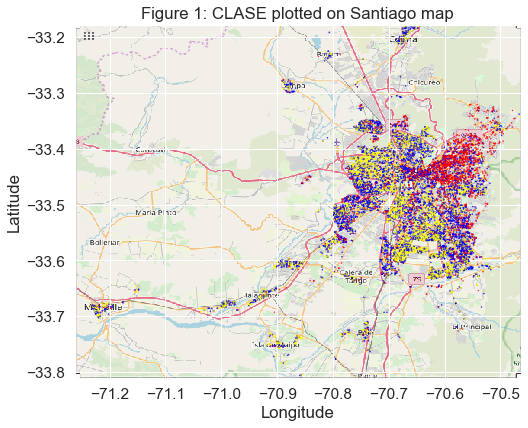

In [92]:
#Reference for plotting on map: https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
import matplotlib.pyplot as plt

Area = ((household_data_raw.longitude.min(),   household_data_raw.longitude.max(),      
         household_data_raw.latitude.min(), household_data_raw.latitude.max()))
sant_map = plt.imread('Santiago_map.png')

colors=['yellow' if x==1 else 'blue' if x==2 else 'red' for x in household_data_raw['CLASE']]

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(household_data_raw.longitude, household_data_raw.latitude, zorder=1, alpha=1, c=colors, s=0.2)
ax.set_title('Figure 1: CLASE plotted on Santiago map')
ax.set_xlim(Area[0],Area[1])
ax.set_ylim(Area[2],Area[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(sant_map, zorder=0, extent = Area, aspect= 'equal')


Each dot on the map above correspond to a household with the following colorcoding:
* CLASE 1: Yellow
* CLASE 2: Blue
* CLASE 3: Red

This initial picture shows that CLASE 3 (>15 years formal education) is concentrated in the north-east corner of the city, whereas CLASE 1 and 2 is mixed throughout the rest of the city. Since we know CLASE 3 is highly educated, we can now test the assumption that high education is correlated to high income by mapping high-income households as per below. 

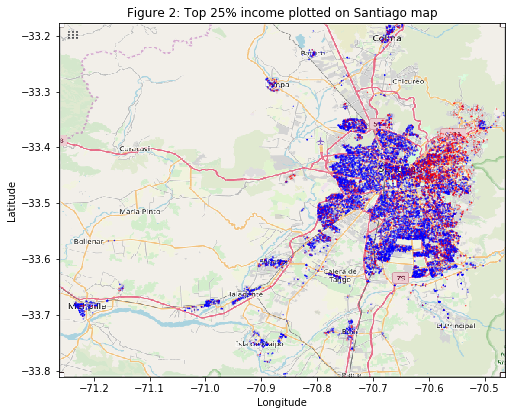

In [13]:
top_25_income=household_data_raw.loc[:,'IngresoHogar'] > np.percentile(household_data_raw['IngresoHogar'], 75) 
colors=['red' if x else 'blue' for x in top_25_income]

sant_map = plt.imread('Santiago_map.png')

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(household_data_raw.longitude, household_data_raw.latitude, zorder=1, alpha=1, c =colors, s=0.1)
ax.set_title('Figure 2: Top 25% income plotted on Santiago map')
ax.set_xlim(Area[0],Area[1])
ax.set_ylim(Area[2],Area[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(sant_map, zorder=0, extent = Area, aspect= 'equal')

This shows, that households with the highest 25% incomes are concentrated in the north-eastern part of Santiago. The correlation between CLASE and the remaining dimensions will be furhter explored in the following sections.

Upon visual inspection on Santiago on Google Maps, we notice that the north-eastern part of the city seems elevated compared to the rest of the city. This is a finding worth including in the analysis, and thus, elevation is added to each household. This is loaded from the United States Geological Survey (USGS), made available through a Google Cloud database. We wish to include this as a dimension when predicting the type of household.

In [14]:
#Reference for rasterio inspiration: https://gis.stackexchange.com/questions/228920/getting-elevation-at-particular-coordinate-lat-lon-programmatically-but-offli
#Database for dataset: https://console.cloud.google.com/storage/browser/gcp-public-data-landsat/LE07/PRE/233/083
#File link: https://storage.cloud.google.com/gcp-public-data-landsat/LE07/PRE/233/083/LE72330832015116EDC00/LE72330832015116EDC00_B6_VCID_2
import rasterio

spatial_data = household_data_raw[['longitude', 'latitude']]
coordinates = [tuple(x) for x in spatial_data.values]
#filePath = 'https://storage.cloud.google.com/gcp-public-data-landsat/LE07/PRE/233/083/LE72330832015116EDC00/LE72330832015116EDC00_B6_VCID_2.TIF'
filePath = 's34_w071_1arc_v3.tif'

eleva_array = np.array([])

with rasterio.open(filePath) as src:
    elevation = src.sample(coordinates)
    for ele in elevation:
        eleva_array = np.append(eleva_array, ele[0])
        
household_data_raw['elevation'] = eleva_array

Elevation has not been added down to a 30 meter accuracy (raster file has a 30x30 meter pixel size, which was the highest resolution we could find publicly available). 30 meters may sound like a lot, but Santiago is approximately 12 km from east to west, and therefore we deem that it is a reasonable resolution to work with. 

We now check the validity of the elevation, by looking at the statistics.

In [15]:
household_data_raw['elevation'].describe().round()

count    16047.0
mean        49.0
std       4129.0
min     -32767.0
25%        497.0
50%        566.0
75%        627.0
max       1102.0
Name: elevation, dtype: float64

In [16]:
household_data_raw[['elevation']].where(household_data_raw.elevation < 0).count()

elevation    250
dtype: int64

We do not expect any negative elevations, and it seems that it is the default value when a pair of coordinates do not match the raster file. Luckily this only affects a small part of the dataset, and we decide to remove them as outliers, as they are not situated in the center of Santiago. Another reason for negative values could be cloud cover on the satelite photo, however we cannot confirm this.

In [17]:
household_data_raw = household_data_raw[household_data_raw.elevation > 0]
household_data_raw['elevation'].describe()

count    15797.000000
mean       568.695322
std         91.314921
min        288.000000
25%        500.000000
50%        568.000000
75%        629.000000
max       1102.000000
Name: elevation, dtype: float64

Finally, we inspect the map using elevation:
* Red: Top 25% elevation
* Yellow: Bottom 25% elevation
* Blue: Remaining (middle 50%)

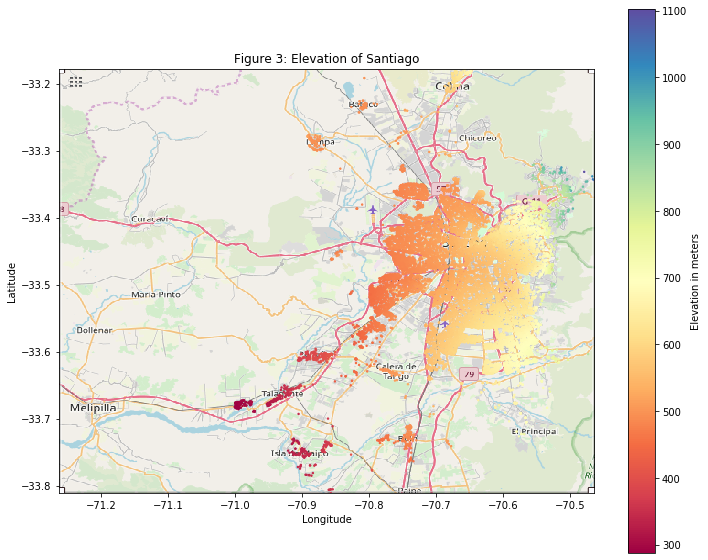

In [18]:
#colors=['red' if x > 629 else 'yellow' if x < 500 else 'blue' for x in household_data_raw['elevation']]
colors = household_data_raw['elevation']
sant_map = plt.imread('Santiago_map.png')

fig, ax = plt.subplots(figsize = (12,10))
im = ax.scatter(household_data_raw.longitude, household_data_raw.latitude, zorder=1, alpha=1, c =colors, cmap='Spectral', s=2)
ax.set_title('Figure 3: Elevation of Santiago')
ax.set_xlim(Area[0],Area[1])
ax.set_ylim(Area[2],Area[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
fig.colorbar(im, ax=ax, label = 'Elevation in meters')
ax.imshow(sant_map, zorder=0, extent = Area, aspect= 'equal')

As expected, the eastern part of the city is elevated compared the middle and west. We decide to include elevation as a dimension in the prediction of what type of household is likely to purchase a home, as we know that CLASE 3 is more likely to live in the north-eastern part of Santiago, which is elevated. 

### Descriptive statistics and plots

The visualization of CLASE across Santiago helped gain an initial understanding of the spread throughout the city, and as mentioned, we also want to explore CLASE using descriptive statistics. 

The distribution of household income for each clase is visualized with histograms below.

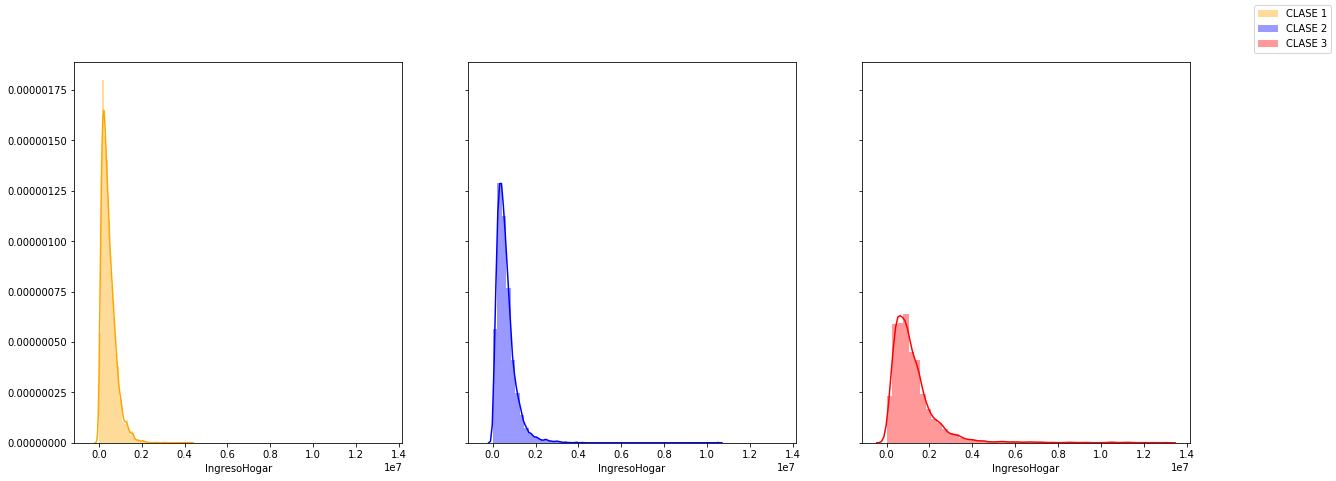

In [19]:
import seaborn as sns
import matplotlib.ticker as ticker

f, axes = plt.subplots(1, 3, figsize=(20, 7), sharex=True, sharey=True)
sns.distplot(household_data_raw[household_data_raw['CLASE']==1]['IngresoHogar'] , color="orange", ax=axes[0], label = 'CLASE 1')
sns.distplot(household_data_raw[household_data_raw['CLASE']==2]['IngresoHogar'] , color="blue", ax=axes[1], label = 'CLASE 2')
sns.distplot(household_data_raw[household_data_raw['CLASE']==3]['IngresoHogar'] , color="red", ax=axes[2], label = 'CLASE 3')
f.legend()

CLASE 1 (<12 years of formal education): Household income in concentrated in the lowest part of the scale with a short tail. The higher the CLASE (and thus formal education), the higher income. This would also be the natural expectation, and it is now confirmed. 

CLASE is further explored using boxplots below, to see the distribution of data for each dimension. We only want to explore the continuous variables for this, including elevation, but excluding the other geospatial data.

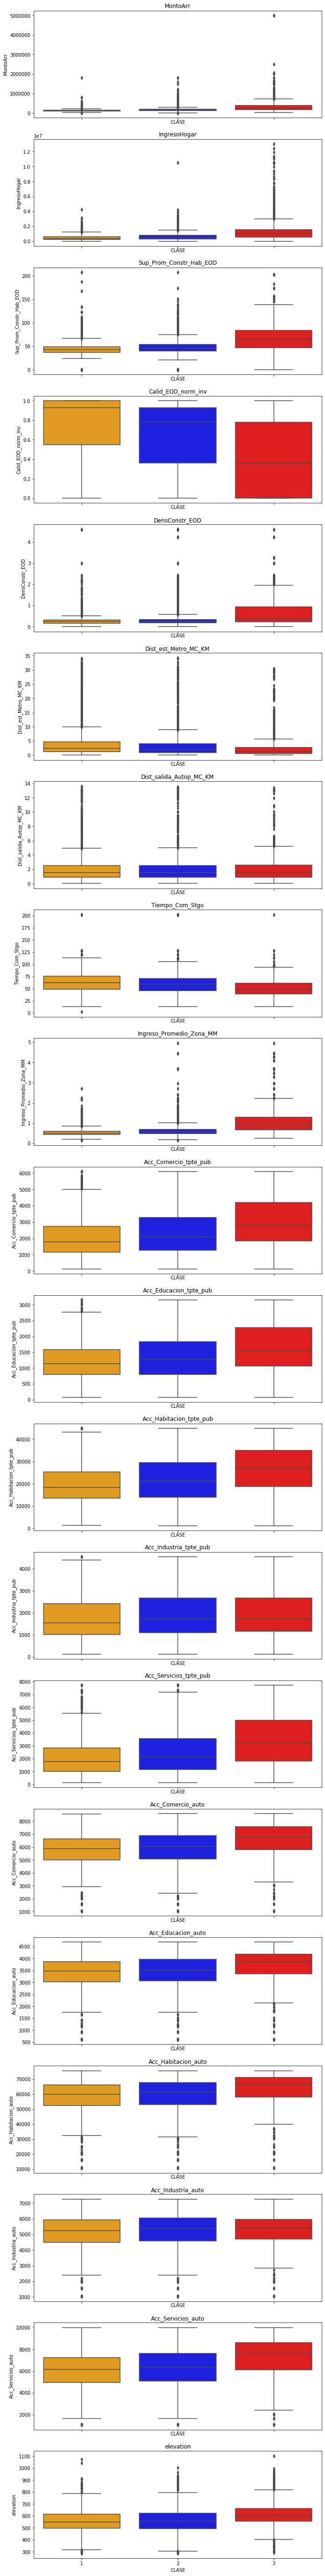

In [20]:
import seaborn as sns
relevant_columns = ['MontoArr', 'IngresoHogar', 'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv',
        'DensConstr_EOD', 'Dist_est_Metro_MC_KM',
       'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo',
       'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto', 'elevation']

fig, axes = plt.subplots(20, 1, figsize=(11, 100), sharex=True)
for name, ax in zip(relevant_columns, axes):
    sns.boxplot(data=household_data_raw, x='CLASE', y=name, ax=ax, palette=['orange','blue','red'])
    ax.set_ylabel(name)
    ax.set_title(name)

In the boxplots above, we observe different Clase-trends for the different variables. A few things to notice are:
- Income (agressoHogar) and monthly rent is higher for clase 3. For income, the median income for clase=3 lies above the 75th percentile for both Clase=1 and Clase=2. Furthermore, clase=3 has a seemingly large portion of outliers that have a significantly high income, which is generally not the case for the other clases. Notice, while it is interesting to see what the distribution of income is with the differnt CLASE classes, income will not be a part of our prediction, as we only use area characteristics for this.
- Accessibility is generally higher for higher clases, the exceptions being access to industry via. car, and access to industry via. public transport
- Avg. zone built surface, construction quality and build density also all clearly differentiate CLASE 3 from CLASE 1 and 2, in that the range for CLASE 3 is much larger and the median is higher/lower than the 75th / 25th percentile of the other two CLASEs.
- As expected elevation is higher for CLASE 3, whereas CLASE 1 and 2 are almost identical.

With that, we would like to explore the correlation of the dataset, in order to look in to what might be usefull to include in the prediction of households. 

### Exploring correlation

The correlation between dimensions is explored below using a heatmap over the correlation matrix. This enables us to quickly identify which dimensions are highly correlated. The purpose of this exercise is to find candidates for dimensionality reduction using PCA, which feeds in to the prediction models. 

We remove categorical values before plotting the correlation matrix.

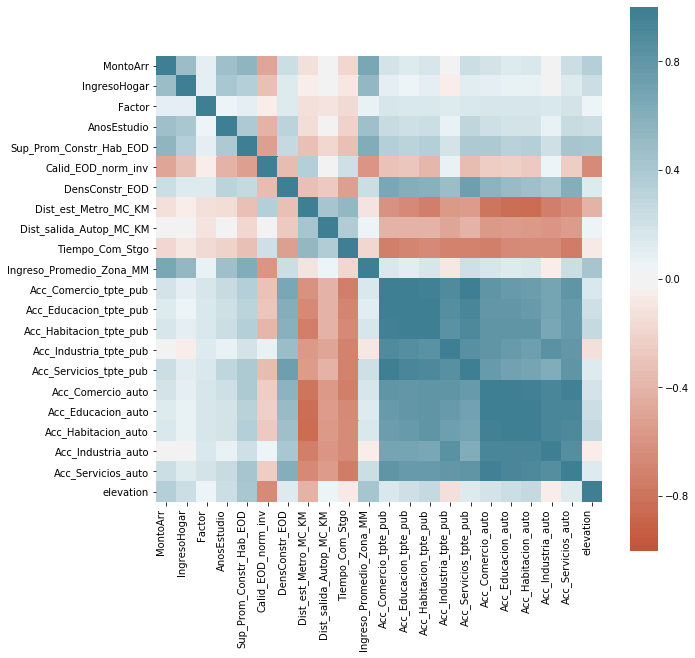

In [21]:
#Reference for correlation heatmap: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

household_no_coor = household_data_raw.drop(columns=['DirCoordX','DirCoordY','longitude','latitude', 'Sector', 'CLASE'])

corr = household_no_coor.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=100),
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

We can conclude from the correlation matrix above that all of the accessibility dimensions are highly correlated with eachother, therefore they are obvious candidates for dimensionality reduction before engaging in predicting households.

### PCA to reduce dimensionality of accessibility

Standardizing the data would be normal practice before a PCA, however, since the PCA only focuses on accessibility (which all have the same unit), it should not make a difference.

The aim of this PCA is to reduce the dimonsions as much as possible, while being able to explain 98% of the variance in the accessibility dimensions.

Finally, we remove all categorical values from the dataset before conducting the PCA.

In [22]:
household_data_input = household_data_raw.drop(columns=['Sector','IngresoHogar','Factor','AnosEstudio','CLASE']);
household_data_input_noLoc = household_data_input.drop(columns=['DirCoordX','DirCoordY', 'longitude', 'latitude', 'elevation']);
household_data_input_noLoc.describe()

MontoArr  Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  \
count  1.579700e+04             15797.000000        15797.000000   
mean   1.867326e+05                50.376901            0.646695   
std    1.583664e+05                21.456216            0.346707   
min    1.000000e+04                 0.000000            0.000000   
25%    1.127110e+05                39.500000            0.360000   
50%    1.500000e+05                45.700000            0.780000   
75%    2.000000e+05                57.300000            0.930000   
max    5.000000e+06               207.300000            1.000000   

       DensConstr_EOD  Dist_est_Metro_MC_KM  Dist_salida_Autop_MC_KM  \
count    15797.000000          15797.000000             15797.000000   
mean         0.381461              3.968889                 1.984284   
std          0.456317              5.735724                 1.693059   
min          0.000000              0.020794                 0.012117   
25%          0.184000              0.853450                 0.880104   
50%          0.258000              1.933209                 1.522221   
75%          0.355000              4.082178                 2.544473   
max          4.599000             34.302672                13.618582   

       Tiempo_Com_Stgo  Ingreso_Promedio_Zona_MM  Acc_Comercio_tpte_pub  \
count     15797.000000              15797.000000           15797.000000   
mean         58.214598                  0.683043            2359.577542   
std          20.209298                  0.376347            1391.299319   
min           2.000000                  0.147514             136.071730   
25%          45.000000                  0.477212            1269.100100   
50%          59.000000                  0.582440            2093.297650   
75%          71.000000                  0.729538            3269.516600   
max         202.000000                  4.957229            6096.118100   

       Acc_Educacion_tpte_pub  Acc_Habitacion_tpte_pub  \
count            15797.000000             15797.000000   
mean              1350.580879             21752.303728   
std                715.109735             10189.873527   
min                 76.699950              1234.228060   
25%                842.474850             14549.141630   
50%               1252.353680             21268.519960   
75%               1854.710770             29891.759370   
max               3151.932340             44854.376160   

       Acc_Industria_tpte_pub  Acc_Servicios_tpte_pub  Acc_Comercio_auto  \
count            15797.000000            15797.000000       15797.000000   
mean              1835.692284             2577.851904        5952.689149   
std               1012.645368             1754.736883        1469.287945   
min                127.394330              132.027180        1048.440000   
25%               1100.577450             1186.478480        5177.080000   
50%               1663.941730             2110.427760        6100.710000   
75%               2578.520720             3570.518670        6978.400000   
max               4536.557030             7713.396150        8583.060000   

       Acc_Educacion_auto  Acc_Habitacion_auto  Acc_Industria_auto  \
count        15797.000000         15797.000000        15797.000000   
mean          3432.579934         58870.302570         5146.477610   
std            782.066125         12713.822792         1196.745236   
min            613.410000         10859.530000         1030.760000   
25%           3093.260000         53571.190000         4582.960000   
50%           3538.920000         61247.900000         5326.170000   
75%           3997.090000         68401.290000         6006.600000   
max           4681.260000         75774.780000         7260.030000   

       Acc_Servicios_auto  
count        15797.000000  
mean          6370.628334  
std           1812.639757  
min           1061.180000  
25%           5137.010000  
50%           6468.390000  
75%           7694.030000  
max       

The relevant accessibility columns for the PCA are extracted and data is transposed to fit the format for PCA.

In [23]:
household_data_acc = household_data_raw[['Acc_Comercio_tpte_pub', 'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub','Acc_Industria_tpte_pub','Acc_Servicios_tpte_pub','Acc_Comercio_auto','Acc_Educacion_auto','Acc_Habitacion_auto','Acc_Industria_auto','Acc_Servicios_auto']];
household_data_acc_t = household_data_acc.T
household_data_acc_t.head()

Hogar                        100010      100020      100030      100041  \
Acc_Comercio_tpte_pub     704.97642   704.97642   704.97642   704.97642   
Acc_Educacion_tpte_pub    406.09830   406.09830   406.09830   406.09830   
Acc_Habitacion_tpte_pub  6110.62492  6110.62492  6110.62492  6110.62492   
Acc_Industria_tpte_pub    671.08681   671.08681   671.08681   671.08681   
Acc_Servicios_tpte_pub    719.84272   719.84272   719.84272   719.84272   

Hogar                        100052      100061      100070      100082  \
Acc_Comercio_tpte_pub     704.97642   704.97642   704.97642   704.97642   
Acc_Educacion_tpte_pub    406.09830   406.09830   406.09830   406.09830   
Acc_Habitacion_tpte_pub  6110.62492  6110.62492  6110.62492  6110.62492   
Acc_Industria_tpte_pub    671.08681   671.08681   671.08681   671.08681   
Acc_Servicios_tpte_pub    719.84272   719.84272   719.84272   719.84272   

Hogar                        100090      100102  ...      399931      399941  \
Acc_Comercio_tpte_pub     704.97642   704.97642  ...   201.88924   201.88924   
Acc_Educacion_tpte_pub    406.09830   406.09830  ...   137.95154   137.95154   
Acc_Habitacion_tpte_pub  6110.62492  6110.62492  ...  2967.30967  2967.30967   
Acc_Industria_tpte_pub    671.08681   671.08681  ...   231.58675   231.58675   
Acc_Servicios_tpte_pub    719.84272   719.84272  ...   188.26424   188.26424   

Hogar                        399951      700400      700410      700990  \
Acc_Comercio_tpte_pub     201.88924   704.97642   704.97642   704.97642   
Acc_Educacion_tpte_pub    137.95154   406.09830   406.09830   406.09830   
Acc_Habitacion_tpte_pub  2967.30967  6110.62492  6110.62492  6110.62492   
Acc_Industria_tpte_pub    231.58675   671.08681   671.08681   671.08681   
Acc_Servicios_tpte_pub    188.26424   719.84272   719.84272   719.84272   

Hogar                         706781       706791       743813       743823  
Acc_Comercio_tpte_pub     2833.63903   2833.63903   4126.69752   2423.25387  
Acc_Educacion_tpte_pub    1587.25210   1587.25210   2462.78833   1530.16896  
Acc_Habitacion_tpte_pub  26638.37017  26638.37017  36601.48715  24049.00136  
Acc_Industria_tpte_pub    2667.49616   2667.49616   3033.01343   2103.14796  
Acc_Servicios_tpte_pub    2815.13223   2815.13223   4514.08964   2275.72271  

[5 rows x 15797 columns]

We define and fit (estimate) the model.

In [24]:
from sklearn import decomposition

pca=decomposition.PCA()
pca.fit(household_data_acc_t)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

As stated above, the purpose of the PCA is to take our 10 data columns and reduce their dimensionality by using a certain amount of eigenvectors produced by the PCA. We wish to be able to explain at least 98% of the variance in the accibility colums. Hence, we need to know how much of the variance is explained by each eigenvector. The function below prints the explained variance ratio of each eigenvector in decreasing order. Furthermore, we plot the cummulative distribution function (CDF), to see visualize how much explanation of variance is gained with each additional eigenvector. 

In [25]:
expl=pca.explained_variance_ratio_
expl

array([9.86610285e-01, 1.30864137e-02, 1.91645466e-04, 7.24527147e-05,
       2.86852566e-05, 7.03674602e-06, 2.39593766e-06, 8.45585408e-07,
       2.39886768e-07, 9.48859533e-33])

[0.9866102847270187,
 0.9996966984067869,
 0.9998883438729289,
 0.9999607965875841,
 0.9999894818441387,
 0.999996518590162,
 0.9999989145278242,
 0.9999997601132322,
 1.0000000000000002,
 1.0000000000000002]

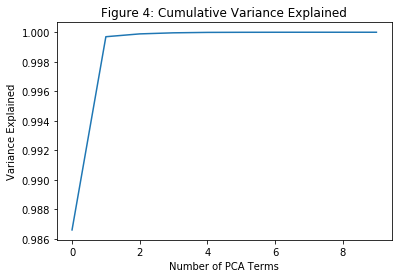

In [26]:
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.plot(range(len(expl)), cdf);
plt.title('Figure 4: Cumulative Variance Explained')
plt.xlabel('Number of PCA Terms')
plt.ylabel('Variance Explained')
cdf[:10] # printing the first 10 eigenvectors ordered by explaied variance.

The CDF plot above shows that the first eigenvalue describes >98% of the variation in the dataset, and therefore we only include the first principle component in the further analysis.

In [27]:
household_data_raw['Acc'] = pca.components_[0]
household_reduced = household_data_raw.copy()
household_reduced = household_reduced.drop(columns=['Acc_Comercio_tpte_pub', 'Acc_Educacion_tpte_pub'
                                                    ,'Acc_Habitacion_tpte_pub','Acc_Industria_tpte_pub',
                                                    'Acc_Servicios_tpte_pub','Acc_Comercio_auto',
                                                    'Acc_Educacion_auto','Acc_Habitacion_auto',
                                                    'Acc_Industria_auto','Acc_Servicios_auto']);
household_reduced.head()

Sector    DirCoordX    DirCoordY  MontoArr  IngresoHogar      Factor  \
Hogar                                                                          
100010       7  335180.8019 -3733579.025    100000        450845  136.393738   
100020       7  338410.2114 -3734392.859    120000       1019369   73.843597   
100030       7  327863.8248 -3742199.914     70000         80000  180.722809   
100041       7  327864.0000 -3742200.000     80000        559259  150.379059   
100052       7  338480.8152 -3732703.059    117771        710309  122.001518   

        AnosEstudio  CLASE  Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  \
Hogar                                                                     
100010           11      1                     53.8                0.98   
100020           11      1                     59.6                0.98   
100030           10      1                     59.5                0.98   
100041           14      2                     59.5                0.98   
100052           12      2                     43.6                0.98   

        DensConstr_EOD  Dist_est_Metro_MC_KM  Dist_salida_Autop_MC_KM  \
Hogar                                                                   
100010           0.059             23.051711                 4.345179   
100020           0.033             21.080177                 1.381521   
100030           0.004             34.147894                11.993389   
100041           0.004             34.147817                11.993268   
100052           0.086             19.908792                 1.363177   

        Tiempo_Com_Stgo  Ingreso_Promedio_Zona_MM   latitude  longitude  \
Hogar                                                                     
100010               69                  0.519765 -33.729444 -70.779035   
100020               84                  0.678317 -33.737278 -70.744340   
100030               83                  0.408158 -33.805994 -70.859656   
100041               83                  0.408158 -33.805995 -70.859654   
100052               94                  0.498140 -33.722055 -70.743270   

        elevation       Acc  
Hogar                        
100010      457.0  0.003904  
100020      480.0  0.003904  
100030      356.0  0.003904  
100041      356.0  0.003904  
100052      489.0  0.003904

That leaves us with a final dataset that serves as the input for the prediction challenge.

### Preparing the data for prediction

Before we start building models to make predictions, we need to prepare the data for classification. The input data does not contain categorical data, so we no do need to use dummy variables.

We have chosen to use three different models to try and predict the household, namely:
- Logistic regression
- Random forest
- Neural network

The reason for using three different models is to investigate which type predicts the household best, ranging from a simple logistic regression that fits non-binary data to a neural network 1 input layer, 2 hidden layers and 1 output layer.

We first wish to split our dataset in a train and a test set, based on the locations of the data.

In [28]:
from sklearn.model_selection import train_test_split

features_using = ['MontoArr', 'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv',
       'DensConstr_EOD', 'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM',
       'Tiempo_Com_Stgo', 'Ingreso_Promedio_Zona_MM', 'Acc', 'elevation'] # , 'elevation'
predicting = ['CLASE']

x_train_full = household_reduced.loc[((household_reduced['latitude'] > -33.4) | (household_reduced['latitude'] < -33.5) | (household_reduced['longitude'] > -70.6) | (household_reduced['longitude'] < -70.7)), features_using]
y_train_full = household_reduced.loc[((household_reduced['latitude'] > -33.4) | (household_reduced['latitude'] < -33.5) | (household_reduced['longitude'] > -70.6) | (household_reduced['longitude'] < -70.7)), predicting]
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)
x_test = household_reduced.loc[((household_reduced['latitude'] >= -33.5) & (household_reduced['latitude'] <= -33.4) & (household_reduced['longitude'] <= -70.6) & (household_reduced['longitude'] >= -70.7)), features_using]
y_test = household_reduced.loc[((household_reduced['latitude'] >= -33.5) & (household_reduced['latitude'] <= -33.4) & (household_reduced['longitude'] <= -70.6) & (household_reduced['longitude'] >= -70.7)), predicting]

In [29]:
print("Num train examples:", len(y_train))
print("Num validation examples:", len(y_val))
print("Num test examples:", len(y_test))

Num train examples: 10545
Num validation examples: 2637
Num test examples: 2615


In [30]:
# Standardizing
x_mean = x_train_full.mean(axis=0)
x_std = x_train_full.std(axis=0)

# Center and scale 
x_train_full = (x_train_full - x_mean) / x_std
x_train = (x_train - x_mean) / x_std
x_val = (x_val - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

### Evaluation and baseline

Each model will be evaluated like we have done in previous exercises using the function below.

In [31]:
# Reference for evaluation function: Class exercise solutions '6. Neural Networks - solutions'
# Reference for heatmap confusion matrix: https://www.kaggle.com/agungor2/various-confusion-matrix-plots

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

# function to evaluate predictions
def evaluate(y_true, y_pred):
    # calculate confusion matrix
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_true), index = np.unique(y_true))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (5,4)) 
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 12}, fmt='d')

    # calculate precision, recall, and F1 score
    accuracy = float(np.trace(cm)) / np.sum(cm)
    precision = precision_score(y_true, y_pred, average=None, labels=labels)[1]
    recall = recall_score(y_true, y_pred, average=None, labels=labels)[1]
    f1 = 2 * precision * recall / (precision + recall)
    print("accuracy:", accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print("f1 score:", f1)

It is always good to evaluate models against some kind of baseline. In this case, we want to make the baseline really simple and just predict all CLASEs to be the most frequent appearing in the source data.

In [32]:
household_reduced['CLASE'].value_counts()

2    6904
1    5836
3    3057
Name: CLASE, dtype: int64

CLASE two is the most frequent, therefore we make the baseline that the entire testset is predicted to be CLASE 2.

In [33]:
y_pred_baseline = y_test.copy()
y_pred_baseline['CLASE'] = 2

accuracy: 0.4397705544933078
precision: 0.4397705544933078
recall: 1.0
f1 score: 0.6108897742363877


C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


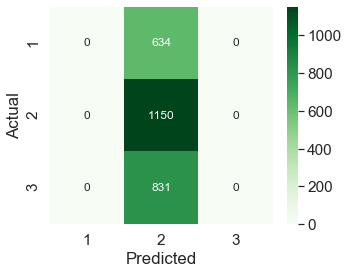

In [34]:
evaluate(y_test, y_pred_baseline)

This baseline is our 'cointoss accuracy', and our models should have an accuracy higher than 0.44 before we can say that they are actually able to make some kind of usable predictions.

### Prediction: Logistic regression

The first model is a logistic regression. We use gridsearch on the entire trainset to find the optimal parameters. We initially ran a simple logistics regression and predicted on the validation set, but found that using gridsearch-crossvalidation, we could tune the parameters to minimize overfitting

In [35]:
#Inspiration from: https://www.kaggle.com/enespolat/grid-search-with-logistic-regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LogReg = LogisticRegression()
param_grid = {
    'penalty': ['l1','l2'],
    'C': np.logspace(-1,5,25)
}

cv_LogReg = GridSearchCV(estimator=LogReg, param_grid=param_grid, cv= 10, verbose=1)
cv_LogReg.fit(x_train_full, y_train_full.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.000000...
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04,
       1.

In [36]:
print("tuned hyperparameters :",cv_LogReg.best_params_)

tuned hyperparameters : {'C': 0.1, 'penalty': 'l1'}


Best params are found to be C=0.1 and penalty=l1, therefore we test the model using these and the test-set.

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


- Train set results:
accuracy: 0.5741920801092398
precision: 0.5333790973056461
recall: 0.5401459854014599
f1 score: 0.536741214057508


- Test set results:
accuracy: 0.5063097514340344
precision: 0.47879282218597063
recall: 0.5104347826086957
f1 score: 0.4941077441077441


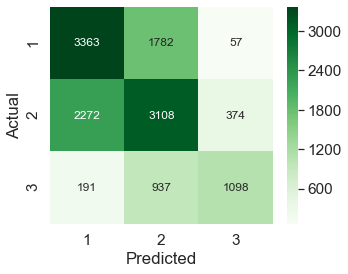

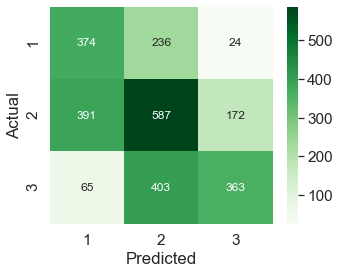

In [37]:
LogReg2 = LogisticRegression(C=0.1, penalty='l1')
LogReg2.fit(x_train_full, y_train_full)
y_pred_train = LogReg2.predict(x_train_full)
y_pred_test = LogReg2.predict(x_test)

print("- Train set results:")
evaluate(y_train_full, y_pred_train)
print('\n')
print("- Test set results:")
evaluate(y_test, y_pred_test)

The logistics regression only slightly outperforms the baseline, and we see that it primarily missclasifies CLASE 1 and CLASE 3, which makes sense when looking at the composition of the training set (most CLASE 2)

Finally, we can question the test-trainset split, in that it might not represent the true characteristics of the entire city. A quick test of this can be done by shuffling the data, retraining the model and see the results. We will test this in the conclusion of the prediction challenge, however the test-train split was defined in the assignment and we can therefore only do it for testing purposes and not include it in the actual prediction. 

### Prediction: Random forest

The next model we deploy is a random forest. As we saw above, the model appear to have a slight bias towards the larger sample group (CLASE 2). A random forest model is good at dealing with unbalanced data, and is generally a model with good predictive performance. A random forest model takes in a number of parameters, and thus we use gridsearch once again to try and find the optimal parameters.

In [38]:
# Inspiration from https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_parameter_tuning_grid_search/ 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create the parameter grid search lists
param_grid = {
    'max_features': list(range(2,10,1)),
    'max_depth': list(range(2,10,2)),
    'n_estimators': list(range(10,101,20))
}
# Create the model
rf = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose = 1)
grid_search.fit(x_train, y_train.values.ravel())
grid_search.best_estimator_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  2.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
print("tuned hyperparameters :",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hyperparameters : {'max_depth': 6, 'max_features': 2, 'n_estimators': 70}
accuracy : 0.5873873873873874


- Train set results:
accuracy: 0.6082503556187767
precision: 0.5595501104639485
recall: 0.6109649122807017
f1 score: 0.5841283153370375


- Test set results:
accuracy: 0.5391969407265774
precision: 0.49507389162561577
recall: 0.6991304347826087
f1 score: 0.5796683489545783


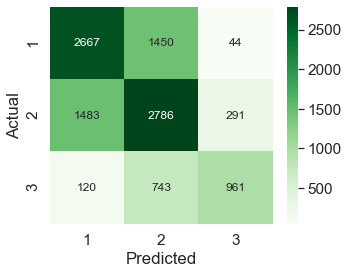

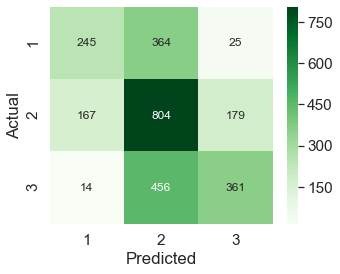

In [40]:
rf2 = RandomForestClassifier(max_features=2, n_estimators=70, max_depth=6)
rf2.fit(x_train, y_train.values.ravel())

y_pred_train = rf2.predict(x_train)
y_pred_test = rf2.predict(x_test)

print("- Train set results:")
evaluate(y_train, y_pred_train)
print('\n')
print("- Test set results:")
evaluate(y_test, y_pred_test)

We see that our random forest model performs better than the logistic regression and baseline accuracy of 0.44, but not by a considerable amount. Once again, we notice that the majority of observations are in CLASE 2. Furthermore, we see that almost no observations are misclassified between CLASE 1 and CLASE 3, stressing that there must be a considerable difference between the two groups. 
Furthermore, we see that the recall of the test set is higher than the other measures. Recall is also known as the sensitivity, and measures the amount of true positives among both true positives and false negatives. The measure explains how many observations the model identified as belonging to the CLASE among all observations that truly belonged to that CLASE. So if we have an observation that belongs to one CLASE, we have a relatively high probability of predicting correctly. This makes sense as almost all the observations belonging to CLASE 2 were correctly classified. 

### Prediction: Neural network

Finally, we would like to implement a neural network with Keras to predict CLASE, and see if we can outperform the other two models. For this, we have split our initial trianing set into 80% training and 20% validation set (shuffled).

In [41]:
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


Since we are using categorical classification, we need to create dummy variables for our three CLASE variables (1,2,3):

In [42]:
y_binary_train=pd.get_dummies(y_train, columns=['CLASE'])
y_binary_val=pd.get_dummies(y_val, columns=['CLASE'])
y_binary_test=pd.get_dummies(y_test, columns=['CLASE'])

Below we define and run our Neural Network using Keras. We use a ReLU activation function, and a softmax as our loss function, as we are doing non-binary classification. After each layer, we use dropout with a rate of 0.5.

In [43]:
# function to fit nnet
def fit_nnet(X_train, y_train, X_val, y_val, num_epochs=15, batch_size=16):
    # define the keras model
    model = Sequential()
    model.add(Dense(100, input_dim=10, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(70, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(3, activation='softmax'))

    # compile the keras model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the keras model on the dataset
    history = model.fit(X_train, y_train, validation_data=(X_val,y_val),
                        epochs=num_epochs, batch_size=batch_size, verbose=1)
    return model, history

In [44]:
fitted_model, history = fit_nnet(x_train, y_binary_train, x_val, y_binary_val, num_epochs=100, batch_size=32)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10545 samples, validate on 2637 samples
Epoch 1/100
10545/10545 [==============================] - 2s 166us/step - loss: 0.9872 - acc: 0.4747 - val_loss: 0.8869 - val_acc: 0.5582
Epoch 2/100
10545/10545 [==============================] - 1s 95us/step - loss: 0.9116 - acc: 0.5159 - val_loss: 0.8706 - val_acc: 0.5624
Epoch 3/100
10545/10545 [==============================] - 1s 96us/step - loss: 0.8943 - acc: 0.5365 - val_loss: 0.8660 - val_acc: 0.5673
Epoch 4/100
10545/10545 [==============================] - 1s 95us/step - loss: 0.8851 - acc: 0.5448 - val_loss: 0.8624 - val_acc: 0.5734
Epoch 5/100
10545/10545 [==============================] - 1s 96us/step - loss: 0.8737 - acc: 0.5488 - val_loss: 0.8596 - val_acc: 0.5783
Epoch 6/100
10545/10545 [====================

Epoch 45/100
10545/10545 [==============================] - 1s 118us/step - loss: 0.8455 - acc: 0.5729 - val_loss: 0.8470 - val_acc: 0.5787
Epoch 46/100
10545/10545 [==============================] - 1s 118us/step - loss: 0.8415 - acc: 0.5789 - val_loss: 0.8458 - val_acc: 0.5757
Epoch 47/100
10545/10545 [==============================] - 1s 118us/step - loss: 0.8470 - acc: 0.5787 - val_loss: 0.8458 - val_acc: 0.5730
Epoch 48/100
10545/10545 [==============================] - 1s 118us/step - loss: 0.8421 - acc: 0.5815 - val_loss: 0.8481 - val_acc: 0.5757
Epoch 49/100
10545/10545 [==============================] - 1s 119us/step - loss: 0.8411 - acc: 0.5748 - val_loss: 0.8444 - val_acc: 0.5813
Epoch 50/100
10545/10545 [==============================] - 1s 118us/step - loss: 0.8447 - acc: 0.5767 - val_loss: 0.8479 - val_acc: 0.5726
Epoch 51/100
10545/10545 [==============================] - 1s 118us/step - loss: 0.8439 - acc: 0.5759 - val_loss: 0.8477 - val_acc: 0.5764
Epoch 52/100
10545/1

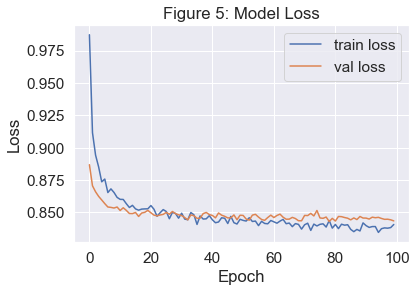

In [45]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train loss", "val loss"])
plt.title('Figure 5: Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

We see that the model converges relatively slowly, and does not reach stability. Initially, we see that our model seems to underfit as the validation loss is smaller than the training loss. The loss stabilizes at around 35 epoches. After around 60 epoches, the model appears to start overfitting. Hence, it appears we need to use an amount of epochs in the range of [35-50]. 

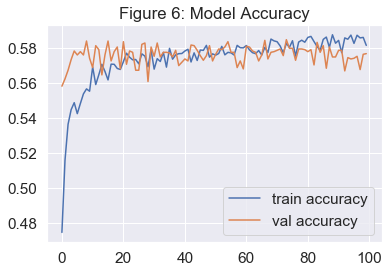

In [46]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"]) #note: This works on windows, however on mac we experienced that you need to write accuracy instead
plt.title('Figure 6: Model Accuracy')
plt.legend(["train accuracy", "val accuracy"])
plt.show()

The accuracy also appear to perform best around 40  epoches. Hence, we will train our model using epochs=40

In [47]:
fitted_model, history = fit_nnet(x_train, y_binary_train, x_val, y_binary_val, num_epochs=40, batch_size=32)

Train on 10545 samples, validate on 2637 samples
Epoch 1/40
10545/10545 [==============================] - 2s 210us/step - loss: 0.9980 - acc: 0.4659 - val_loss: 0.8927 - val_acc: 0.5442
Epoch 2/40
10545/10545 [==============================] - 1s 127us/step - loss: 0.9157 - acc: 0.5188 - val_loss: 0.8722 - val_acc: 0.5601
Epoch 3/40
10545/10545 [==============================] - 1s 125us/step - loss: 0.8976 - acc: 0.5286 - val_loss: 0.8669 - val_acc: 0.5620
Epoch 4/40
10545/10545 [==============================] - 1s 118us/step - loss: 0.8880 - acc: 0.5434 - val_loss: 0.8593 - val_acc: 0.5719
Epoch 5/40
10545/10545 [==============================] - 1s 118us/step - loss: 0.8772 - acc: 0.5471 - val_loss: 0.8575 - val_acc: 0.5722
Epoch 6/40
10545/10545 [==============================] - 1s 119us/step - loss: 0.8774 - acc: 0.5476 - val_loss: 0.8588 - val_acc: 0.5741
Epoch 7/40
10545/10545 [==============================] - 1s 120us/step - loss: 0.8708 - acc: 0.5507 - val_loss: 0.8567 - v

- Train set results:
accuracy: 0.5890943575154102
precision: 0.5523996082272282
recall: 0.49473684210526314
f1 score: 0.5219805645534475

- Test set results:
accuracy: 0.5395793499043977
precision: 0.4996712689020381
recall: 0.6608695652173913
f1 score: 0.5690752527143391


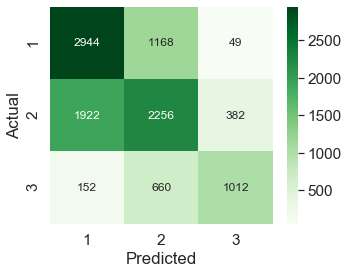

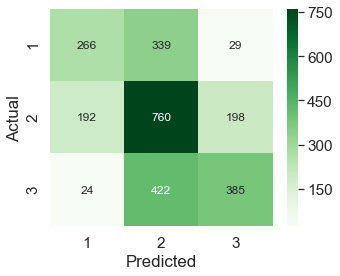

In [48]:
# evaluate the keras model
y_pred_nn = fitted_model.predict(x_test)
y_pred_train_nn = fitted_model.predict(x_train)

# evaluating the output of the softmax
y_pred = np.argmax(y_pred_nn, axis=1)
y_pred_train = np.argmax(y_pred_train_nn, axis=1)

# evaluate the predictions 
print("- Train set results:")
evaluate(y_train, y_pred_train+1) #y_test_nn is on indexes 1,2,3 while y_pred is 0,1,2 so adding one

print("\n- Test set results:")
evaluate(y_test, y_pred+1) # 

We see that our accuracy is higher than baseline (44%), however, it does not appear to be highly accurate. The Precision and f1 score is around the same as the accuracy metric, while the recall is slightly larger (69.7%). Hence, our sensitivity is higher since recall measures the amount of true positives out of all relevant instances.

With this neural network, it is important to keep in mind that training and building an optimal neural network model takes a great amount of work, and it could be optimized with several other things outside the scope of this course. There are many parameter tuning steps that can be taken. Some of these include:
- Testing drop-out versus no drop-out. Dropout helps simplify our model, however, this is typically not needed in a as simple model as we have. Rate could be tweaked as well 
- Pooling (AvgPool or Maxpool) could be used to subsample our feature set 
- Different amount of layers could be explored, along with a sigmoid function instead of a softmax function 
- Different types of Neural Networks


### Conclusion on prediction challenge 

With regards to adding elevation to the dataset. We did it in this case because we noticed that it would probably correlate well with one of the CLASEs, namely CLASE 3. This was confirmed in the descriptive statistics, however it would be relevant to test whether this holds true for other regions in Chile, or whether it is just a coincidence in the case of Santiago.

We see that all three of our models were not able to predict the type of household that will buy a house given area characteristics to a high degree. A reason for this could lie in the train/test split that we use. If we look at the CLASE locations in the very first geospatial plot, it appears that there is an uneven distribution of CLASEs in the test and train sets, which could be reflected in the outcome. We know that the CLASE categories contain different amounts, but in the calculations below we see that the ratio of each CLASE value for the split is uneven. This could create biases in our dataset. 

In [49]:
totalCLASE = household_reduced.CLASE.value_counts() 
trainCLASE = y_train.CLASE.value_counts() 
testCLASE = y_test.CLASE.value_counts() 
print('Total:\n',totalCLASE,'\nTrain: \n', trainCLASE,'\nTest: \n', testCLASE)

Total:
 2    6904
1    5836
3    3057
Name: CLASE, dtype: int64 
Train: 
 2    4560
1    4161
3    1824
Name: CLASE, dtype: int64 
Test: 
 2    1150
3     831
1     634
Name: CLASE, dtype: int64


In [50]:
testCLASE/totalCLASE

1    0.108636
2    0.166570
3    0.271835
Name: CLASE, dtype: float64

If this was to be re-done, one could split the train/test set by pulling random samples, instead of splitting based on locations. In the section below, we have re-split our dataset using sklearn's train_test_split function, and re-done the logstic regression model:

- Train set results:


C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy: 0.5651623405987157
precision: 0.52234417875343
recall: 0.5527898776187513
f1 score: 0.5371359467902851


- Test set results:
accuracy: 0.5721518987341773
precision: 0.5365033621517772
recall: 0.5362457993278925
f1 score: 0.536374549819928


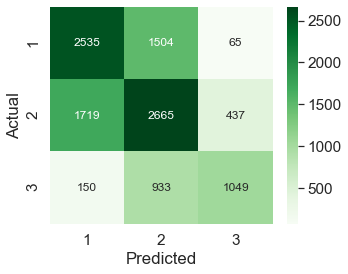

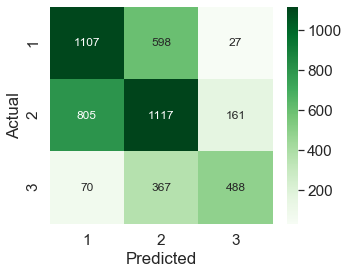

In [51]:
#Splitting and shuffling data
train, test = train_test_split(household_reduced, train_size=0.7, shuffle=True)
X_train, y_train = train[features_using], train[predicting]
X_test, y_test = test[features_using], test[predicting]

#Standardising data
x_train_standard=(X_train-X_train.mean())/X_train.std()
x_test_standard=(X_test-X_test.mean())/X_test.std()

#Setting up and training simple model
model_n=LogisticRegression()
model_n.fit(x_train_standard, y_train)

#Predicting
y_pred_train = model_n.predict(x_train_standard)
y_pred_test = model_n.predict(x_test_standard)

#Evaluating
print("- Train set results:")
evaluate(y_train, y_pred_train)
print('\n')
print("- Test set results:")
evaluate(y_test, y_pred_test)

After the new train/test split definition, we see that our test-accuracy has improved, and is now aligned with the train-set accuracy, meaning that our train-set does not overfit as much as previously.

# Exploratory study of Santiago de Chiles housing market

Our initial approach to the exploratory study was to visually inspect the Santiago de Chile metropolitan area on Google Earth to get a feel for the different areas. From this, we gathered that the north-eastern part of the city mainly consisted of large detached houses with pools, and the western part of the city mainly consisted of one-story houses with metal sheet roofs. That lead us to an initial hypothesis that the type of households are very clearly separated in these two areas (in terms of wealth/income), and we decided to look at other differences in the area. As an example, we noticed that the north-eastern part of the city was elevated compared to the rest of the city.

In terms of adding new dimensions to the dataset, we thought of and tried several things that could impact the type of household that buys a particular property.
* Detection of pools would almost certainly identify CLASE 3, because there are no private pools in the poorer areas, whereas there are pools visible on (nearly) all properties in the rich north-eastern area. We found the following code to conduct this study, but was unable to implement it due to a missing license for ArcGis, and also the code describes a comprehensive deep learning network. Source: https://developers.arcgis.com/python/sample-notebooks/detecting-swimming-pools-using-satellite-image-and-deep-learning/
* Crime numbers by area: Another hypothesis we investigated was the level of crime in each zone of the city, working under the assumption that there is more crime in poor areas, and less crime in rich areas. We were however unable to obtain a dataset with statistics on crime as well as zones / spatial information, despite finding the official webpage of criminal statistics in the Santiago Region, however it seems they do not provide data for the public anymore. 
* Finally, since we observed that elevation played a role, in that the rich neighbourhood was located on a hillside, and thus we investigated how to add elevation to the coordinates. This was done using USGS data on Google Cloud, as seen in the predictive

In our research we also stumbled upon several other datasets, which we deemed irrelevant to the research question. This included car-crash statistics for each street in Santiago and a lot of geographical/geological data.


Finally, we decided to investigate rent in our exploratory study, specifically we want to know how rent is connected to different factors.

* External factors, in terms of accessibility and construction quality in the zone
* Internal factors, in terms of the type of household that lives there (income and education)

First up, we investigate if the external factors provide guidance on the rent of a household. We would like to explore this in terms of clusters, therefore we started by looking at the spread of the data to see if there are any initial findings.

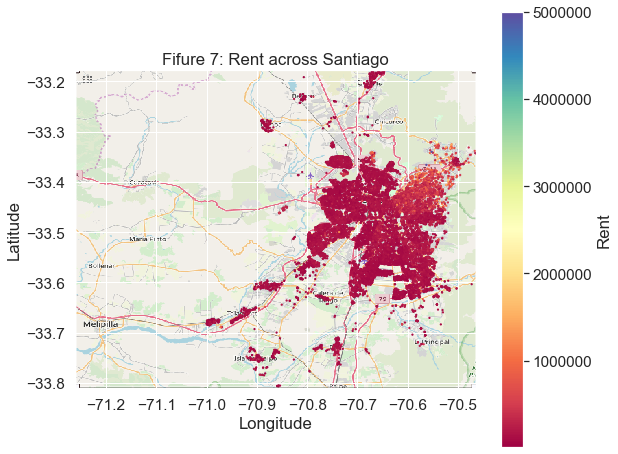

In [52]:
#Exploring rent across Santiago
colors=household_reduced['MontoArr']

sant_map = plt.imread('Santiago_map.png')

fig, ax = plt.subplots(figsize = (9,8))
im = ax.scatter(household_reduced.longitude, household_reduced.latitude, zorder=1, alpha=1, c =colors, cmap='Spectral',s=1.5)
ax.set_title('Fifure 7: Rent across Santiago')
ax.set_xlim(Area[0],Area[1])
ax.set_ylim(Area[2],Area[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(sant_map, zorder=0, extent = Area, aspect= 'equal')
fig.colorbar(im, ax=ax, label = 'Rent')

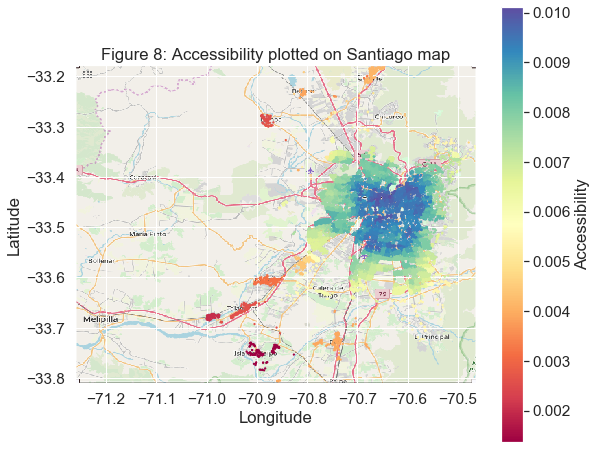

In [53]:
#Exploring accessibility across Santiago using the PCA component to represent 'total accessibility'
colors=household_reduced['Acc']

sant_map = plt.imread('Santiago_map.png')

fig, ax = plt.subplots(figsize = (9,8))
im = ax.scatter(household_reduced.longitude, household_reduced.latitude, zorder=1, alpha=1, c =colors, cmap='Spectral',s=1.5)
ax.set_title('Figure 8: Accessibility plotted on Santiago map')
ax.set_xlim(Area[0],Area[1])
ax.set_ylim(Area[2],Area[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(sant_map, zorder=0, extent = Area, aspect= 'equal')
fig.colorbar(im, ax=ax, label = 'Accessibility')

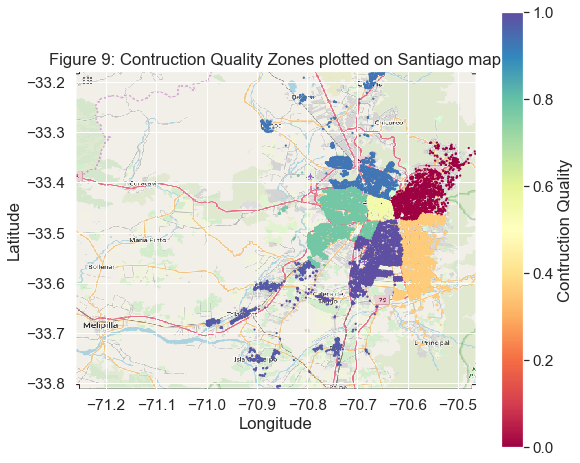

In [54]:
#Exploring construction quality across Santiago
colors=household_reduced['Calid_EOD_norm_inv']

sant_map = plt.imread('Santiago_map.png')

fig, ax = plt.subplots(figsize = (9,8))
im = ax.scatter(household_reduced.longitude, household_reduced.latitude, zorder=1, alpha=1, c =colors, cmap='Spectral',s=1.5)
ax.set_title('Figure 9: Contruction Quality Zones plotted on Santiago map')
ax.set_xlim(Area[0],Area[1])
ax.set_ylim(Area[2],Area[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(sant_map, zorder=0, extent = Area, aspect= 'equal')
fig.colorbar(im, ax=ax, label = 'Contruction Quality')


We quickly notice that the rent is very unevenly distributed, with most of the city in the very low part of the span.
Secondly the accessibility component is nicely distributed and is distributed as expected; the center of the city has the higehst accessibility, which propagates outwards.
Finally, the construction quality is found not to be continuous, but rather constitute 7 different clusters! That means we will not use it for another clustering excercise, as we expect it would dominate the results. We can use it for evaluating our resulting clusters however, to see if there is a connection between high quality of construction in a zone and high rent.

With these discoveries, we decide to revisit our hypothesis, and purely focus on accessibility as an external factor. This is the basis for our clustering exercise.

In [55]:
clustering_data = household_data_raw

By looking at the accessibility boxplots in the descriptive statistics previously in the report, we see that the accessibilities actualy differentiate the three clases, in that CLASE 1 is lowest, CLASE 2 is typically in the middle and CLASE 3 is quite a bit ahead of the others. This is what we hope to see in terms of rent as well. 

Before we can confirm this, we standardize the data and select the relevant columns.

In [56]:
#Standardizing input due to different ranges in accessibility.
clustering_data_mean = clustering_data.mean()
clustering_data_sd = clustering_data.std()

# Center and scale
clustering_standard = (clustering_data - clustering_data_mean) / clustering_data_sd
clustering_standard.head()

Sector  DirCoordX  DirCoordY  MontoArr  IngresoHogar    Factor  \
Hogar                                                                      
100010  1.660368  -1.212768  -2.510631 -0.547670     -0.331641  0.320845   
100020  1.660368  -0.819566  -2.588434 -0.421381      0.477343 -0.531134   
100030  1.660368  -2.103660  -3.334791 -0.737104     -0.859337  0.924640   
100041  1.660368  -2.103638  -3.334799 -0.673960     -0.177373  0.511336   
100052  1.660368  -0.810969  -2.426888 -0.435456      0.037565  0.124813   

        AnosEstudio     CLASE  Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  \
Hogar                                                                        
100010    -0.331815 -1.129788                 0.159539            0.961346   
100020    -0.331815 -1.129788                 0.429857            0.961346   
100030    -0.616133 -1.129788                 0.425196            0.961346   
100041     0.521139  0.241180                 0.425196            0.961346   
100052    -0.047497  0.241180                -0.315848            0.961346   

        ...  Acc_Servicios_tpte_pub  Acc_Comercio_auto  Acc_Educacion_auto  \
Hogar   ...                                                                  
100010  ...               -1.058853          -1.984825           -2.110781   
100020  ...               -1.058853          -1.984825           -2.110781   
100030  ...               -1.058853          -1.984825           -2.110781   
100041  ...               -1.058853          -1.984825           -2.110781   
100052  ...               -1.058853          -1.984825           -2.110781   

        Acc_Habitacion_auto  Acc_Industria_auto  Acc_Servicios_auto  latitude  \
Hogar                                                                           
100010            -2.231009           -1.916271             -1.8275 -2.498985   
100020            -2.231009           -1.916271             -1.8275 -2.582187   
100030            -2.231009           -1.916271             -1.8275 -3.311989   
100041            -2.231009           -1.916271             -1.8275 -3.311998   
100052            -2.231009           -1.916271             -1.8275 -2.420510   

        longitude  elevation       Acc  
Hogar                                   
100010  -1.263550  -1.223188 -2.216597  
100020  -0.872215  -0.971312 -2.216597  
100030  -2.172901  -2.329250 -2.216597  
100041  -2.172880  -2.329250 -2.216597  
100052  -0.860146  -0.872752 -2.216597  

[5 rows x 29 columns]

In [57]:
clustering_standard = clustering_standard.drop(columns=['Sector', 'DirCoordX', 'DirCoordY', 'IngresoHogar', 'Factor', 'AnosEstudio', 'CLASE', 'Sup_Prom_Constr_Hab_EOD',
       'DensConstr_EOD', 'Dist_est_Metro_MC_KM', 'Calid_EOD_norm_inv',
       'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo',
       'Ingreso_Promedio_Zona_MM', 'latitude', 'longitude', 'elevation', 'Acc']);
clustering_standard.head()

MontoArr  Acc_Comercio_tpte_pub  Acc_Educacion_tpte_pub  \
Hogar                                                             
100010 -0.547670              -1.189249               -1.320752   
100020 -0.421381              -1.189249               -1.320752   
100030 -0.737104              -1.189249               -1.320752   
100041 -0.673960              -1.189249               -1.320752   
100052 -0.435456              -1.189249               -1.320752   

        Acc_Habitacion_tpte_pub  Acc_Industria_tpte_pub  \
Hogar                                                     
100010                -1.535022               -1.150063   
100020                -1.535022               -1.150063   
100030                -1.535022               -1.150063   
100041                -1.535022               -1.150063   
100052                -1.535022               -1.150063   

        Acc_Servicios_tpte_pub  Acc_Comercio_auto  Acc_Educacion_auto  \
Hogar                                                                   
100010               -1.058853          -1.984825           -2.110781   
100020               -1.058853          -1.984825           -2.110781   
100030               -1.058853          -1.984825           -2.110781   
100041               -1.058853          -1.984825           -2.110781   
100052               -1.058853          -1.984825           -2.110781   

        Acc_Habitacion_auto  Acc_Industria_auto  Acc_Servicios_auto  
Hogar                                                                
100010            -2.231009           -1.916271             -1.8275  
100020            -2.231009           -1.916271             -1.8275  
100030            -2.231009           -1.916271             -1.8275  
100041            -2.231009           -1.916271             -1.8275  
100052            -2.231009           -1.916271             -1.8275

In [58]:
clustering_standard.corr()

MontoArr  Acc_Comercio_tpte_pub  \
MontoArr                 1.000000               0.182151   
Acc_Comercio_tpte_pub    0.182151               1.000000   
Acc_Educacion_tpte_pub   0.128982               0.981222   
Acc_Habitacion_tpte_pub  0.176110               0.961844   
Acc_Industria_tpte_pub  -0.026675               0.885394   
Acc_Servicios_tpte_pub   0.233794               0.980924   
Acc_Comercio_auto        0.181572               0.802817   
Acc_Educacion_auto       0.130262               0.772433   
Acc_Habitacion_auto      0.152335               0.746419   
Acc_Industria_auto      -0.006844               0.682920   
Acc_Servicios_auto       0.241151               0.800791   

                         Acc_Educacion_tpte_pub  Acc_Habitacion_tpte_pub  \
MontoArr                               0.128982                 0.176110   
Acc_Comercio_tpte_pub                  0.981222                 0.961844   
Acc_Educacion_tpte_pub                 1.000000                 0.983539   
Acc_Habitacion_tpte_pub                0.983539                 1.000000   
Acc_Industria_tpte_pub                 0.872142                 0.820916   
Acc_Servicios_tpte_pub                 0.934923                 0.912435   
Acc_Comercio_auto                      0.794476                 0.802299   
Acc_Educacion_auto                     0.793849                 0.810046   
Acc_Habitacion_auto                    0.769843                 0.801157   
Acc_Industria_auto                     0.685197                 0.676615   
Acc_Servicios_auto                     0.759642                 0.758531   

                         Acc_Industria_tpte_pub  Acc_Servicios_tpte_pub  \
MontoArr                              -0.026675                0.233794   
Acc_Comercio_tpte_pub                  0.885394                0.980924   
Acc_Educacion_tpte_pub                 0.872142                0.934923   
Acc_Habitacion_tpte_pub                0.820916                0.912435   
Acc_Industria_tpte_pub                 1.000000                0.845261   
Acc_Servicios_tpte_pub                 0.845261                1.000000   
Acc_Comercio_auto                      0.799473                0.771358   
Acc_Educacion_auto                     0.770819                0.715765   
Acc_Habitacion_auto                    0.731774                0.690058   
Acc_Industria_auto                     0.831597                0.629618   
Acc_Servicios_auto                     0.787408                0.805877   

                         Acc_Comercio_auto  Acc_Educacion_auto  \
MontoArr                          0.181572            0.130262   
Acc_Comercio_tpte_pub             0.802817            0.772433   
Acc_Educacion_tpte_pub            0.794476            0.793849   
Acc_Habitacion_tpte_pub           0.802299            0.810046   
Acc_Industria_tpte_pub            0.799473            0.770819   
Acc_Servicios_tpte_pub            0.771358            0.715765   
Acc_Comercio_auto                 1.000000            0.983605   
Acc_Educacion_auto                0.983605            1.000000   
Acc_Habitacion_auto               0.973594            0.994491   
Acc_Industria_auto                0.929682            0.931376   
Acc_Servicios_auto                0.973782            0.919041   

                         Acc_Habitacion_auto  Acc_Industria_auto  \
MontoArr                            0.152335           -0.006844   
Acc_Comercio_tpte_pub               0.746419            0.682920   
Acc_Educacion_tpte_pub              0.769843            0.685197   
Acc_Habitacion_tpte_pub             0.801157            0.676615   
Acc_Industria_tpte_pub              0.731774            0.831597   
Acc_Servicios_tpte_pub              0.690058            0.629618   
Acc_Comercio_auto                   0.973594            0.929682   
Acc_Educacion_auto                  0.994491            0.931376   
Acc_Habitacion_auto                 1.000000            0.916266   
Acc_Industria_aut

In [59]:
clustering_standard = clustering_standard.dropna()
clustering_standard_fit = clustering_standard #We use the clustering_standard later
clustering_standard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15797 entries, 100010 to 743823
Data columns (total 11 columns):
MontoArr                   15797 non-null float64
Acc_Comercio_tpte_pub      15797 non-null float64
Acc_Educacion_tpte_pub     15797 non-null float64
Acc_Habitacion_tpte_pub    15797 non-null float64
Acc_Industria_tpte_pub     15797 non-null float64
Acc_Servicios_tpte_pub     15797 non-null float64
Acc_Comercio_auto          15797 non-null float64
Acc_Educacion_auto         15797 non-null float64
Acc_Habitacion_auto        15797 non-null float64
Acc_Industria_auto         15797 non-null float64
Acc_Servicios_auto         15797 non-null float64
dtypes: float64(11)
memory usage: 1.4 MB


Now we are able to make clusters. First, we try to determine the number of clusters using the elbow method.

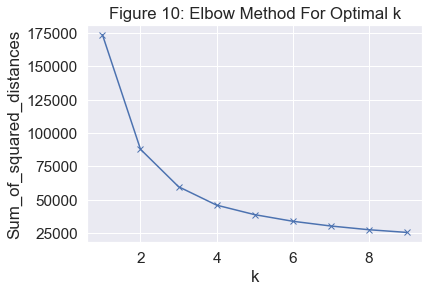

In [60]:
#Inspiration from: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(clustering_standard_fit)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Figure 10: Elbow Method For Optimal k')
plt.show()

This does not yield a 'hard elbow', therefore we try to use a different approach to find the right number of clusters to use for Kmeans, namely by plotting the silhouette.

In [61]:
#Inspiration from: https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Clustering_metrics.ipynb

from sklearn.metrics import silhouette_score

km_silhouette = []

for i in range(2,10):
    km = KMeans(n_clusters=i).fit(clustering_standard_fit)
    preds = km.predict(clustering_standard_fit)

    silhouette = silhouette_score(clustering_standard_fit,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 2: 0.42330640677816866
Silhouette score for number of cluster(s) 3: 0.42524524871918135
Silhouette score for number of cluster(s) 4: 0.3567002991146148
Silhouette score for number of cluster(s) 5: 0.3705891637320423
Silhouette score for number of cluster(s) 6: 0.3046072667697711
Silhouette score for number of cluster(s) 7: 0.3006430464016599
Silhouette score for number of cluster(s) 8: 0.31083068946017767
Silhouette score for number of cluster(s) 9: 0.29522581481454585


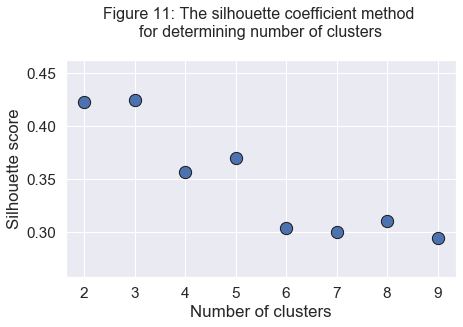

In [62]:
plt.figure(figsize=(7,4))
plt.title("Figure 11: The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.xticks([i for i in range(2,10)])
plt.show()

This yields 1-2 clusters, which is also what we would derive from the elbow-plot, however two clusters is not ideal, when we already have 3 clases.

Upon inspection of the previous plots, we see that the rent is actually skewed a lot (heatmap is almost a single color, meaning there are few, very high values). This is confirmed with the boxplot below. That could be a reason, therefore we decide to exclude all the very high rents.
This will mostly impact CLASE 3, but we are actually more interested in CLASE 1 and 2 in the exploratory study, since we focused on CLASE 3 in the prediction challenge by adding elevation to the dataset.

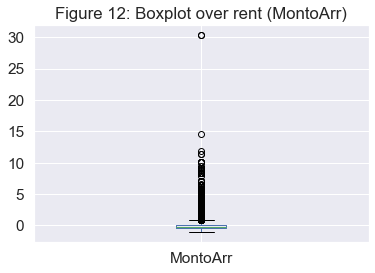

In [63]:
clustering_standard_fit.boxplot('MontoArr')
plt.title('Figure 12: Boxplot over rent (MontoArr)')
plt.show()

We do a quick calculation to see how many households are above the 75th percentile, to assess whether we can simply exclude them.

In [64]:
print("No. of households above 75th percentile:",clustering_standard_fit.MontoArr.where(clustering_standard_fit.MontoArr > np.percentile(clustering_standard_fit.MontoArr, 75)).count())
print("No. of households below 75th percentile:",clustering_standard_fit.MontoArr.where(clustering_standard_fit.MontoArr <= np.percentile(clustering_standard_fit.MontoArr, 75)).count())

clustering_standard_fit = clustering_standard_fit.where(clustering_standard_fit.MontoArr <= np.percentile(clustering_standard_fit.MontoArr, 75))
clustering_standard_fit = clustering_standard_fit.dropna() 

No. of households above 75th percentile: 3407
No. of households below 75th percentile: 12390


We judge that it is okay to exclude all households above the 75th percentile. The map below shows that we complete exclude the entire north-eastern part of the city, which is what we targetted.

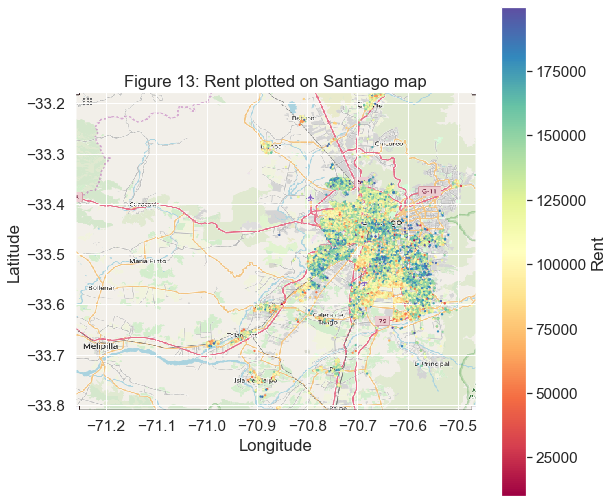

In [65]:
colors=household_reduced['MontoArr'].where(household_reduced['MontoArr'] < np.percentile(household_reduced['MontoArr'], 75))

sant_map = plt.imread('Santiago_map.png')

fig, ax = plt.subplots(figsize = (9,9))
im = ax.scatter(household_reduced.longitude, household_reduced.latitude, zorder=1, alpha=1, c =colors, cmap='Spectral',s=1.5)
ax.set_title('Figure 13: Rent plotted on Santiago map')
ax.set_xlim(Area[0],Area[1])
ax.set_ylim(Area[2],Area[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(sant_map, zorder=0, extent = Area, aspect= 'equal')
fig.colorbar(im, ax=ax, label = 'Rent')

It is interesting, that we can almost see a few clusters (blue / yellow) on the map of rent.

Time for some clustering - using rent and accessibility!

In [66]:
km_silhouette = []

for i in range(2,10):
    km = KMeans(n_clusters=i).fit(clustering_standard_fit)
    preds = km.predict(clustering_standard_fit)

    silhouette = silhouette_score(clustering_standard_fit,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 2: 0.433706226529946
Silhouette score for number of cluster(s) 3: 0.4588216585196326
Silhouette score for number of cluster(s) 4: 0.39674810254656867
Silhouette score for number of cluster(s) 5: 0.33480371368951933
Silhouette score for number of cluster(s) 6: 0.33846638091913267
Silhouette score for number of cluster(s) 7: 0.32247076381890133
Silhouette score for number of cluster(s) 8: 0.34139719428485704
Silhouette score for number of cluster(s) 9: 0.33810807327672027


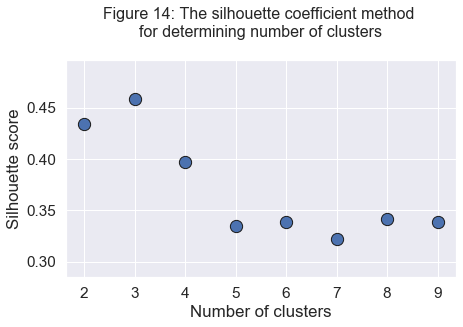

In [67]:
plt.figure(figsize=(7,4))
plt.title("Figure 14: The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.xticks([i for i in range(2,10)])
plt.show()

We found that 3 clusters would be best, therefore we now run kmeans.

In [68]:
from sklearn.cluster import KMeans

K=3
k=KMeans(K)

k.fit(clustering_standard_fit);
clustering_standard_fit['cluster']=k.fit_predict(clustering_standard_fit)

In [69]:
clustering_standard_fit = pd.merge(clustering_standard_fit, household_reduced[['longitude','latitude','CLASE']], on='Hogar', how='left')
clustering_standard_fit.head()

MontoArr  Acc_Comercio_tpte_pub  Acc_Educacion_tpte_pub  \
Hogar                                                             
100010 -0.547670              -1.189249               -1.320752   
100020 -0.421381              -1.189249               -1.320752   
100030 -0.737104              -1.189249               -1.320752   
100041 -0.673960              -1.189249               -1.320752   
100052 -0.435456              -1.189249               -1.320752   

        Acc_Habitacion_tpte_pub  Acc_Industria_tpte_pub  \
Hogar                                                     
100010                -1.535022               -1.150063   
100020                -1.535022               -1.150063   
100030                -1.535022               -1.150063   
100041                -1.535022               -1.150063   
100052                -1.535022               -1.150063   

        Acc_Servicios_tpte_pub  Acc_Comercio_auto  Acc_Educacion_auto  \
Hogar                                                                   
100010               -1.058853          -1.984825           -2.110781   
100020               -1.058853          -1.984825           -2.110781   
100030               -1.058853          -1.984825           -2.110781   
100041               -1.058853          -1.984825           -2.110781   
100052               -1.058853          -1.984825           -2.110781   

        Acc_Habitacion_auto  Acc_Industria_auto  Acc_Servicios_auto  cluster  \
Hogar                                                                          
100010            -2.231009           -1.916271             -1.8275        2   
100020            -2.231009           -1.916271             -1.8275        2   
100030            -2.231009           -1.916271             -1.8275        2   
100041            -2.231009           -1.916271             -1.8275        2   
100052            -2.231009           -1.916271             -1.8275        2   

        longitude   latitude  CLASE  
Hogar                                
100010 -70.779035 -33.729444      1  
100020 -70.744340 -33.737278      1  
100030 -70.859656 -33.805994      1  
100041 -70.859654 -33.805995      2  
100052 -70.743270 -33.722055      2

In [70]:
clustering_standard_fit['cluster'].value_counts()

0    6361
1    4656
2    1373
Name: cluster, dtype: int64

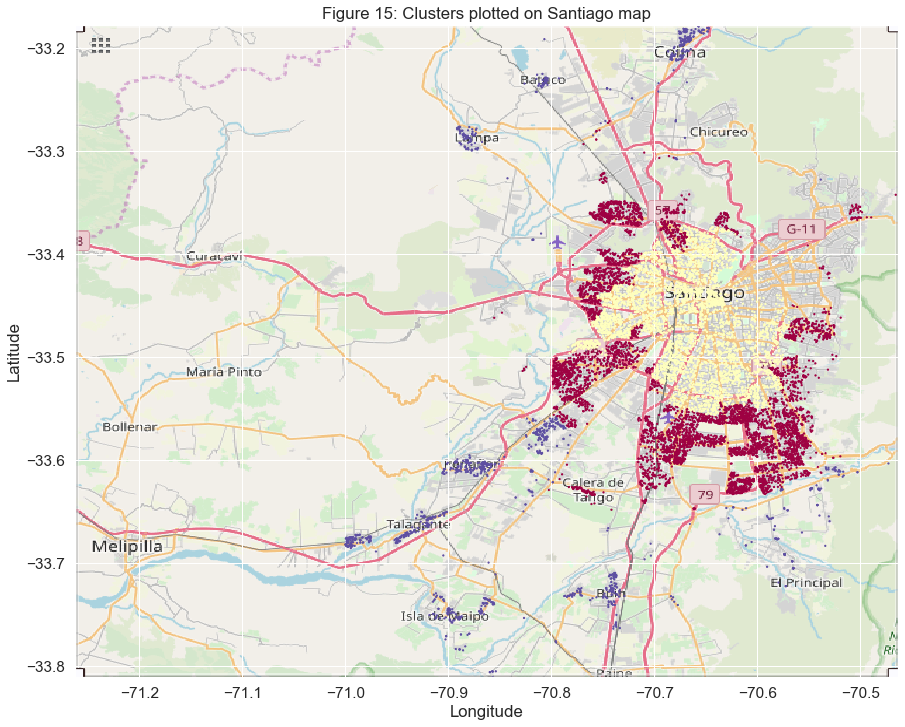

In [71]:
colors=clustering_standard_fit['cluster']

sant_map = plt.imread('Santiago_map.png')

fig, ax = plt.subplots(figsize = (15,12))
im = ax.scatter(clustering_standard_fit.longitude, clustering_standard_fit.latitude, zorder=1, alpha=1, c =colors, cmap='Spectral',s=1.5)
ax.set_title('Figure 15: Clusters plotted on Santiago map')
ax.set_xlim(Area[0],Area[1])
ax.set_ylim(Area[2],Area[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(sant_map, zorder=0, extent = Area, aspect= 'equal')

In order to determine whether our hypothesis holds or not, we look at the mean rent and mean total accessibility. To see if CLASE plays any role, we add that as well. 

Total accessibility is obtained by adding all accessibilities. This is only done for the sake of readability, instead of having 10 accessibility parameters. This only makes slight sense, however all accessibilities have the same unit and have been standardized, which means they should be comparable.

In [72]:
clustering_standard_fit['Total_acc'] = clustering_standard_fit[['Acc_Comercio_tpte_pub', 'Acc_Educacion_tpte_pub',
       'Acc_Habitacion_tpte_pub', 'Acc_Industria_tpte_pub',
       'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto', 'Acc_Educacion_auto',
       'Acc_Habitacion_auto', 'Acc_Industria_auto', 'Acc_Servicios_auto']].sum(axis=1)
clustering_standard_fit[['MontoArr', 'Total_acc', 'CLASE']].groupby(clustering_standard_fit['cluster']).mean().sort_values(by=['MontoArr'])

MontoArr  Total_acc     CLASE
cluster                               
2       -0.442063 -18.265744  1.535324
0       -0.365743  -3.982580  1.616570
1       -0.298503   8.054460  1.715206

These clusers (despite being quite simple) confirm that the closer to the center, the higher rent you have. Accessibilities are also higher in the center, thus we conclude that external factors do play a role. 

We want to explore this relationship further though, as it seems to propagate outwards relatively evenly ( higher accessibility --> higher rent). This can be done with linear regression.

In [73]:
#Inspiration from: https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

reg = LinearRegression()
reg.fit(clustering_standard_fit['MontoArr'].values.reshape(-1,1), clustering_standard_fit['Total_acc'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

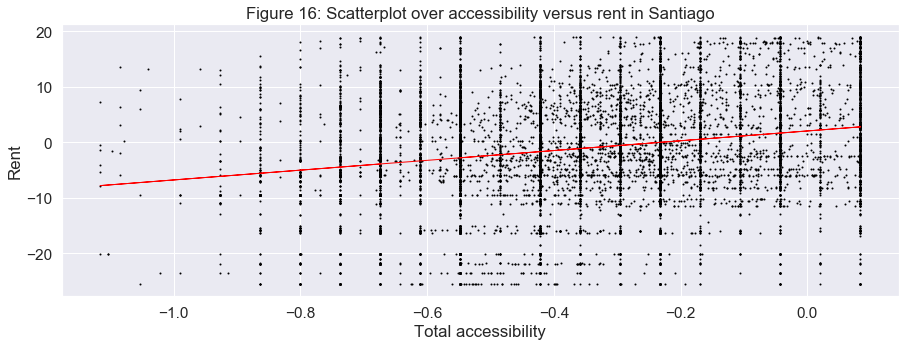

In [74]:
predictions = reg.predict(clustering_standard_fit['MontoArr'].values.reshape(-1,1))

plt.figure(figsize=(15, 5))
plt.scatter(clustering_standard_fit['MontoArr'],clustering_standard_fit['Total_acc'],c='black', s=1)
plt.plot(clustering_standard_fit['MontoArr'], predictions, c='red', linewidth=1)

plt.xlabel("Total accessibility")
plt.ylabel("Rent")
plt.title('Figure 16: Scatterplot over accessibility versus rent in Santiago')
plt.show()

In [75]:
X2 = sm.add_constant(clustering_standard_fit['MontoArr'])
y=clustering_standard_fit['Total_acc']
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_acc   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     701.3
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          2.33e-150
Time:                        21:06:27   Log-Likelihood:                -44694.
No. Observations:               12390   AIC:                         8.939e+04
Df Residuals:                   12388   BIC:                         8.941e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0355      0.141     14.419      0.0

C:\Users\andj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


We see that the R^2 value is close to zero, hence there is almost no correlation between rent and accessibility. The slight positive value indicates that a higher accessibility results in a higher rent.

Having looked in to the external factors affecting rent, we now want to conduct a similar study of the 'internal' factors, namely income and education - So, do rich and educated people have high rent?

In this case, CLASE is the result of a previous clustering exercise on these two parameters, therefore we will not try to re-cluster that. Instead, we are going to investigate the relationship between rent and these factors using linear regression.

In [76]:
LinReg_data = household_data_raw.where(household_data_raw.CLASE != 3)

#Standardizing input due to different ranges in accessibility.
LinReg_data_mean = LinReg_data.mean()
LinReg_data_sd = LinReg_data.std()

# Center and scale
LinReg_data_std = (LinReg_data - LinReg_data_mean) / LinReg_data_sd
LinReg_data_std.head()

Sector  DirCoordX  DirCoordY  MontoArr  IngresoHogar    Factor  \
Hogar                                                                      
100010  1.565717  -1.105427  -2.360326 -0.581683     -0.226237  0.373187   
100020  1.565717  -0.710408  -2.435900 -0.352763      1.148718 -0.518652   
100030  1.565717  -2.000435  -3.160878 -0.925062     -1.123112  1.005230   
100041  1.565717  -2.000413  -3.160886 -0.810602      0.035959  0.572589   
100052  1.565717  -0.701772  -2.278983 -0.378276      0.401268  0.167983   

        AnosEstudio     CLASE  Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  \
Hogar                                                                        
100010     0.032504 -1.087616                 0.428083            0.880584   
100020     0.032504 -1.087616                 0.757337            0.880584   
100030    -0.357419 -1.087616                 0.751660            0.880584   
100041     1.202271  0.919370                 0.751660            0.880584   
100052     0.422426  0.919370                -0.150949            0.880584   

        ...  Acc_Servicios_tpte_pub  Acc_Comercio_auto  Acc_Educacion_auto  \
Hogar   ...                                                                  
100010  ...               -1.010651          -1.886005           -1.996962   
100020  ...               -1.010651          -1.886005           -1.996962   
100030  ...               -1.010651          -1.886005           -1.996962   
100041  ...               -1.010651          -1.886005           -1.996962   
100052  ...               -1.010651          -1.886005           -1.996962   

        Acc_Habitacion_auto  Acc_Industria_auto  Acc_Servicios_auto  latitude  \
Hogar                                                                           
100010            -2.105195           -1.834471           -1.752838 -2.348234   
100020            -2.105195           -1.834471           -1.752838 -2.428982   
100030            -2.105195           -1.834471           -1.752838 -3.137265   
100041            -2.105195           -1.834471           -1.752838 -3.137274   
100052            -2.105195           -1.834471           -1.752838 -2.272073   

        longitude  elevation       Acc  
Hogar                                   
100010  -1.156568  -1.163347 -2.096997  
100020  -0.762962  -0.900042 -2.096997  
100030  -2.071197  -2.319600 -2.096997  
100041  -2.071175  -2.319600 -2.096997  
100052  -0.750824  -0.797010 -2.096997  

[5 rows x 29 columns]

In [77]:
LinReg_data_ready = LinReg_data_std.drop(columns=['Sector', 'DirCoordX', 'DirCoordY', 'Factor', 'CLASE', 'Sup_Prom_Constr_Hab_EOD',
       'DensConstr_EOD', 'Dist_est_Metro_MC_KM', 'Calid_EOD_norm_inv',
       'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo',
       'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub', 'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto','Acc_Servicios_auto', 
    'latitude', 'longitude', 'elevation', 'Acc']);
LinReg_data_ready = LinReg_data_ready.dropna() 
LinReg_data_ready.head()

MontoArr  IngresoHogar  AnosEstudio
Hogar                                      
100010 -0.581683     -0.226237     0.032504
100020 -0.352763      1.148718     0.032504
100030 -0.925062     -1.123112    -0.357419
100041 -0.810602      0.035959     1.202271
100052 -0.378276      0.401268     0.422426

Once again, we first plot the data before fitting the regression, just to see.

Text(0, 0.5, 'Rent')

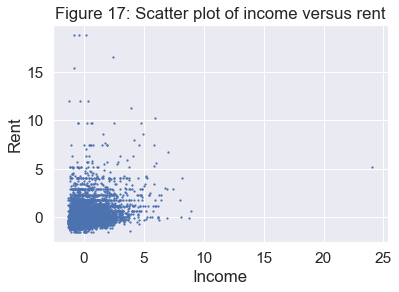

In [78]:
plt.scatter(LinReg_data_ready.IngresoHogar, LinReg_data_ready.MontoArr, zorder=1, alpha=1,s=1.5)
plt.title('Figure 17: Scatter plot of income versus rent')
plt.xlabel('Income')
plt.ylabel('Rent')

There seems to no apparent relationship, however, we find this surprising, so we continue our investigation. 

In [79]:
Xs = LinReg_data_ready.drop(['MontoArr'], axis=1)
y = LinReg_data_ready['MontoArr'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)
print("The linear model is: Rent = {:.3} + {:.3}*Household Income + {:.3}*Household education".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]))

The linear model is: Rent = -1.08e-16 + 0.238*Household Income + 0.202*Household education


Note, that we are currently working with standardized data to get everything on a similar scale.

In [80]:
X = np.column_stack((LinReg_data_ready['IngresoHogar'], LinReg_data_ready['AnosEstudio']))
y = LinReg_data_ready['MontoArr']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               MontoArr   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     834.6
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:06:27   Log-Likelihood:                -17292.
No. Observations:               12740   AIC:                         3.459e+04
Df Residuals:                   12737   BIC:                         3.461e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.076e-16      0.008  -1.29e-14      1.0

We see that our R^2 value is relatively close to 0, hence there does not seem to be a relationship between the two. However, our F-statistics is significantly higher than one, which indicated the opposite. There seem to be some confusion between the predictability. This indicates that these analyses should be done on more data in the future.

## Conclusion on exploratory study

After having done a thorough investigation of rent based on different metrics, we found that is was difficult to find relationships in the data with the chosen models. We found a slight correlation between both accessibility and rent, as well as income/education and rent, but they both had relatively small R^2 values. 

### Closing thoughts on exploratory study:

Typically, on the housing market, the real-estate agent has some knowledge about the prices of nearby houses. We thought about exploring this after having gone down the rent-path, however, we were unable to complete the study in time. 
Our approach would have involved making a grid and comparing prices in each square in order to predict the rent of a given house. Our expectation is that it would yield quite a high accuracy if you have 25-50 houses in a grid, with few outliers from expensive households.

# Conclusion

In this study, we applied various business analytics methods and tools to analyse the housing market in Santiago Del Chile. Initially, we found that building models to predict the CLASE was not overly successful given the models we chose. The best performing model permormed less than 15 percent points better than baseline. 

With regards to the exploratory analysis, we investigated rent as a function of different parameters. Unfortunately, we were not able to find any intersting trends. Further studies could include more data and more investigations. During the report, we gave a few suggestions to these. 